# Agglomerative Clustering Dataset Random

## Import library untuk clustering

In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

## Generate Random Data

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

## Plotting Random Data

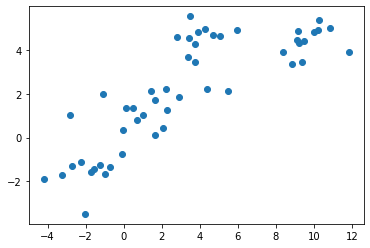

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

## Agglomerative Clustering

### Single Linkage

In [4]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='single')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

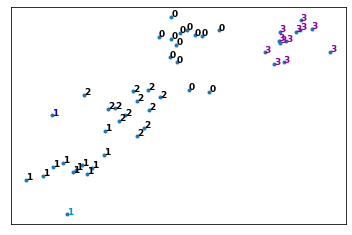

In [5]:
# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (cx, 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

### Average Linkage

In [6]:
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
agg.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

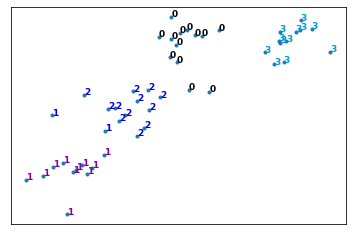

In [7]:
# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered

# Create a minimum and maximum range of X1.
xmin, xmax = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - xmin) / (xmax - xmin)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (cx, 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agg.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

## Plotting Dendrogram

### Distance Matrix

In [8]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         0.25078697 0.14464814 ... 0.06718278 0.4867337  0.17745254]
 [0.25078697 0.         0.11676081 ... 0.18366562 0.2371456  0.42627734]
 [0.14464814 0.11676081 0.         ... 0.08263115 0.35265392 0.31404632]
 ...
 [0.06718278 0.18366562 0.08263115 ... 0.         0.4195898  0.24402896]
 [0.4867337  0.2371456  0.35265392 ... 0.4195898  0.         0.66315073]
 [0.17745254 0.42627734 0.31404632 ... 0.24402896 0.66315073 0.        ]]


### Dendrogram Single Linkage

<ipython-input-9-b2bcb76015b7>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')


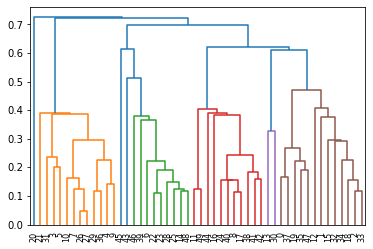

In [9]:
X = hierarchy.linkage(dist_matrix, 'single')
dendro = hierarchy.dendrogram(X)

### Dendrogram Average Linkage

<ipython-input-10-923cff47969c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


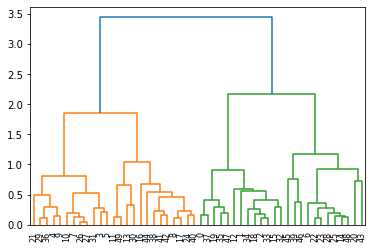

In [10]:
Y = hierarchy.linkage(dist_matrix, 'average')
dendro2 = hierarchy.dendrogram(Y)

# Agglomerative Clustering Dataset Cars_Clustering

## Read Data

In [11]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


## Data Cleaning

In [12]:
print("Shape of dataset before cleaning: ", pdf.size)
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 
     'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 
     'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


## Feature Selection

In [13]:
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Clustering With Scipy

In [15]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-15-7641c8e41239>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


### Linkage

In [16]:
import pylab
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')

<ipython-input-16-b1a41605a7f9>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-16-b1a41605a7f9>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


#### Single Linkage

In [17]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

##### Menentukan jumlah cluster

In [18]:
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

##### Plotting Dendogram

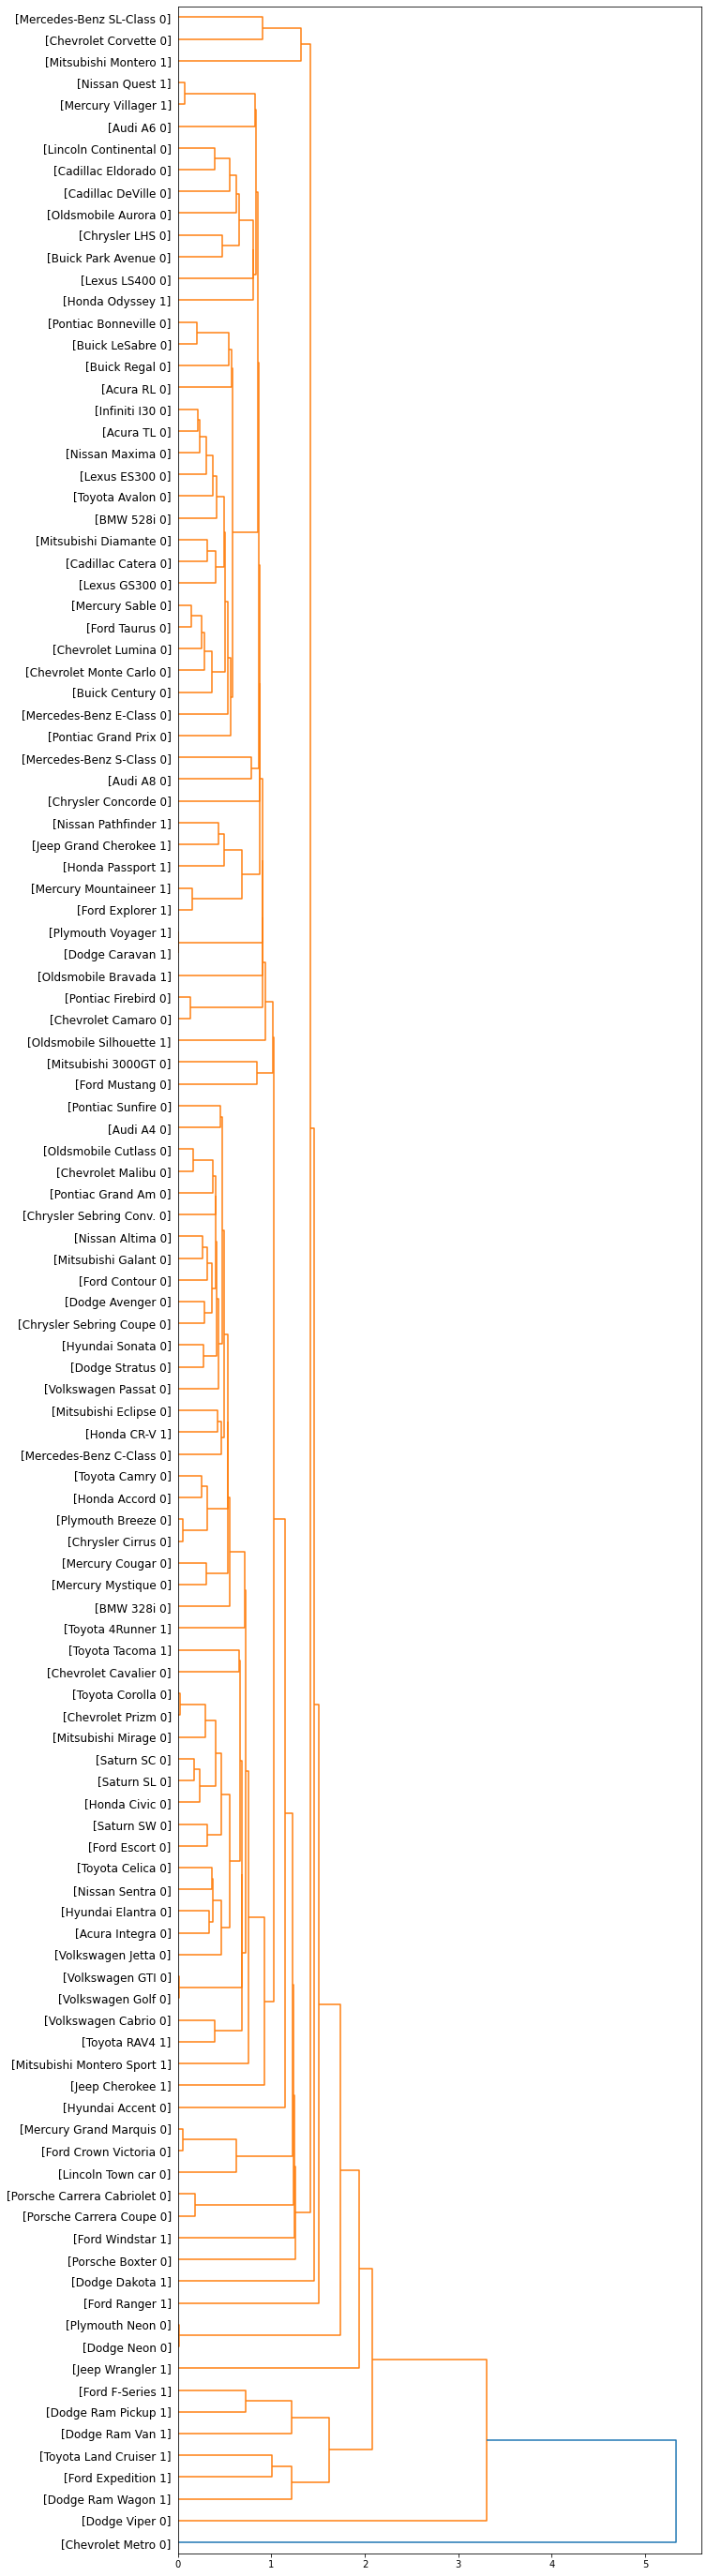

In [19]:
fig = pylab.figure(figsize=(10,50))
def lif(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro = hierarchy.dendrogram(X, leaf_label_func=lif, leaf_rotation=0, leaf_font_size=12, orientation='right')

#### Average Linkage

In [20]:
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

##### Menentukan jumlah cluster

In [21]:
k = 5
clusters = fcluster(Y, k, criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

##### Plotting Dendogram

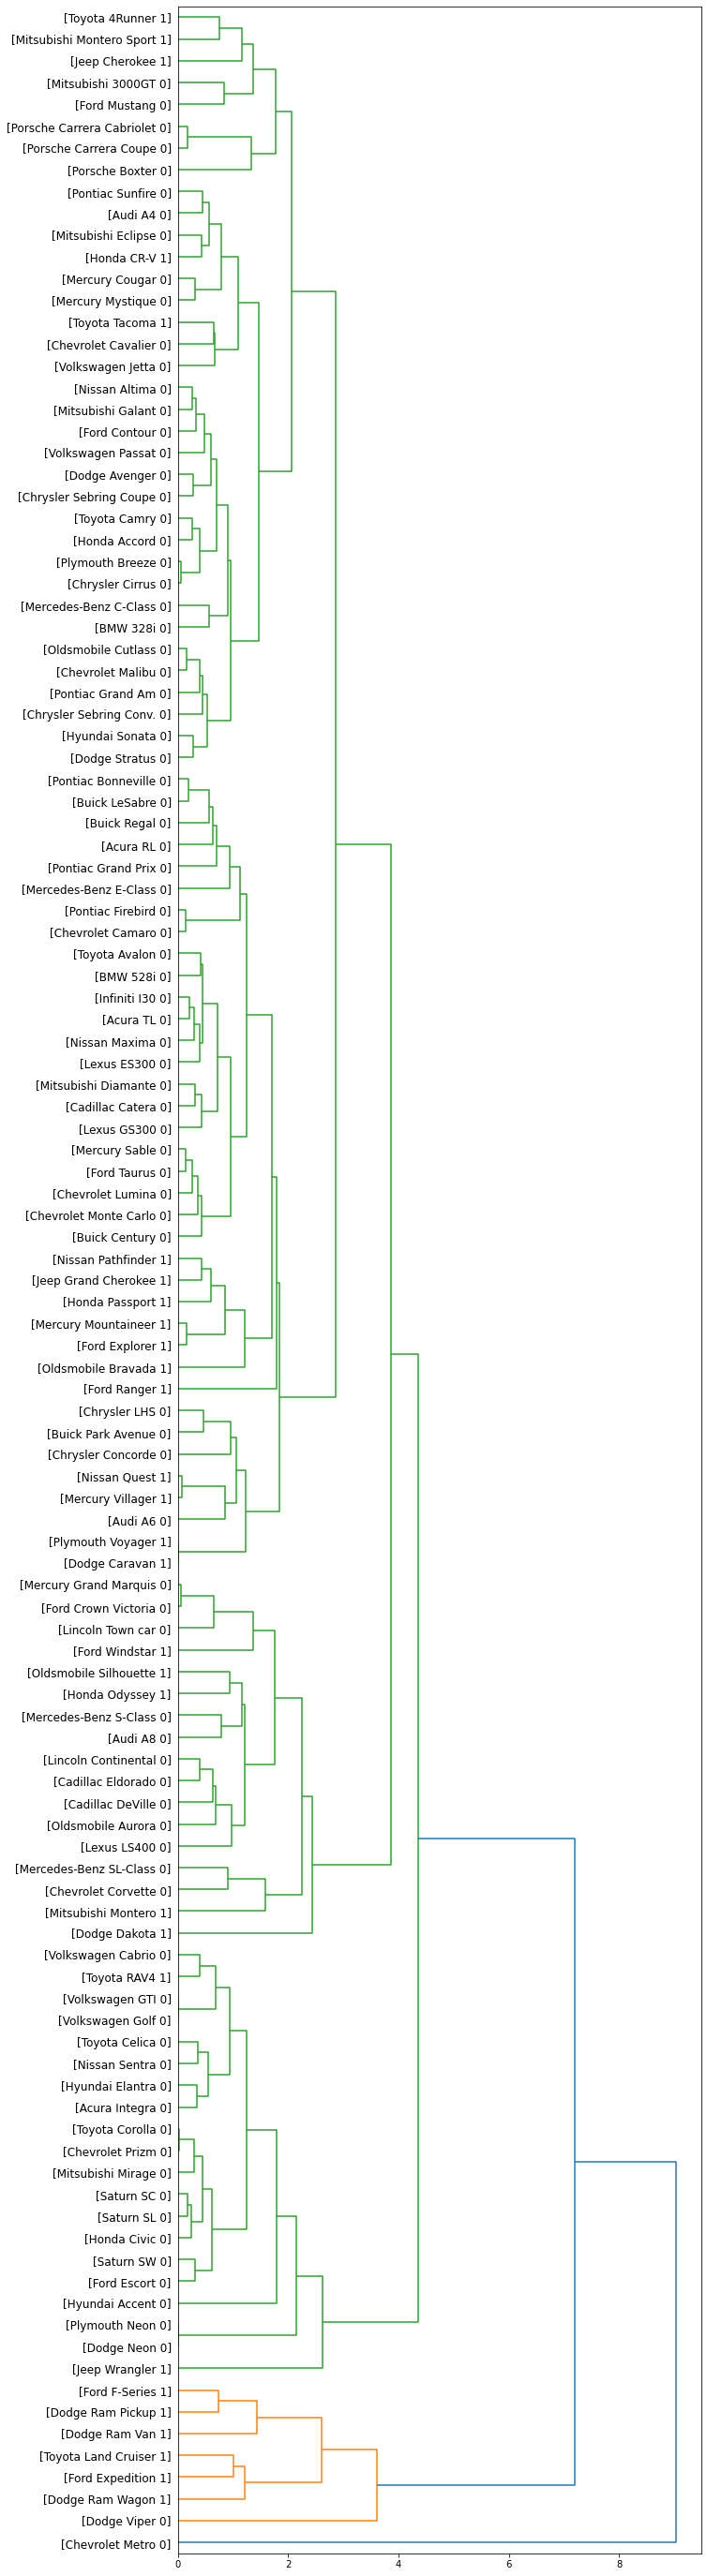

In [22]:
fig = pylab.figure(figsize=(10,50))
def lif(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))

dendro = hierarchy.dendrogram(Y, leaf_label_func=lif, leaf_rotation=0, leaf_font_size=12, orientation='right')

## Clustering With Scikit-Learn

In [23]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


### Single Linkage

In [24]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='single')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0], dtype=int64)

#### Menambah field untuk menunjukkan cluster dari setiap baris

In [25]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

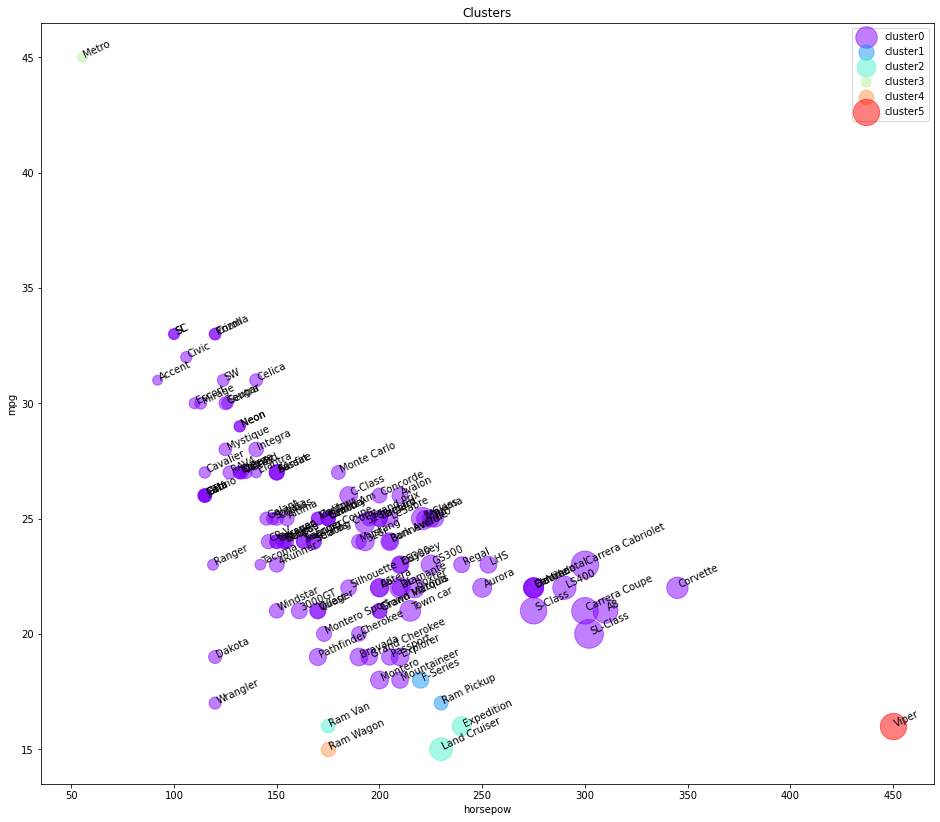

In [26]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
clusters_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, clusters_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

#### Menghitung jumlah kasus di setiap kelompok

In [27]:
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

#### Melihat karakteristik masing-masing cluster

In [28]:
agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-28-e0779597faec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

#### Plotting Dendogram

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

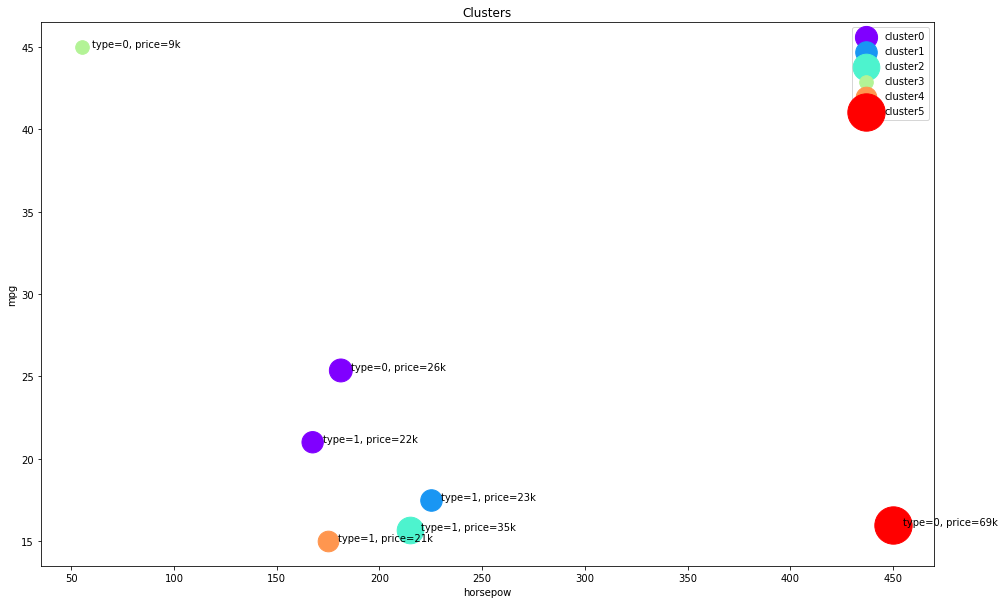

In [29]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, clusters_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

### Average Linkage

In [30]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0], dtype=int64)

#### Menambah field untuk menunjukkan cluster dari setiap baris

In [31]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

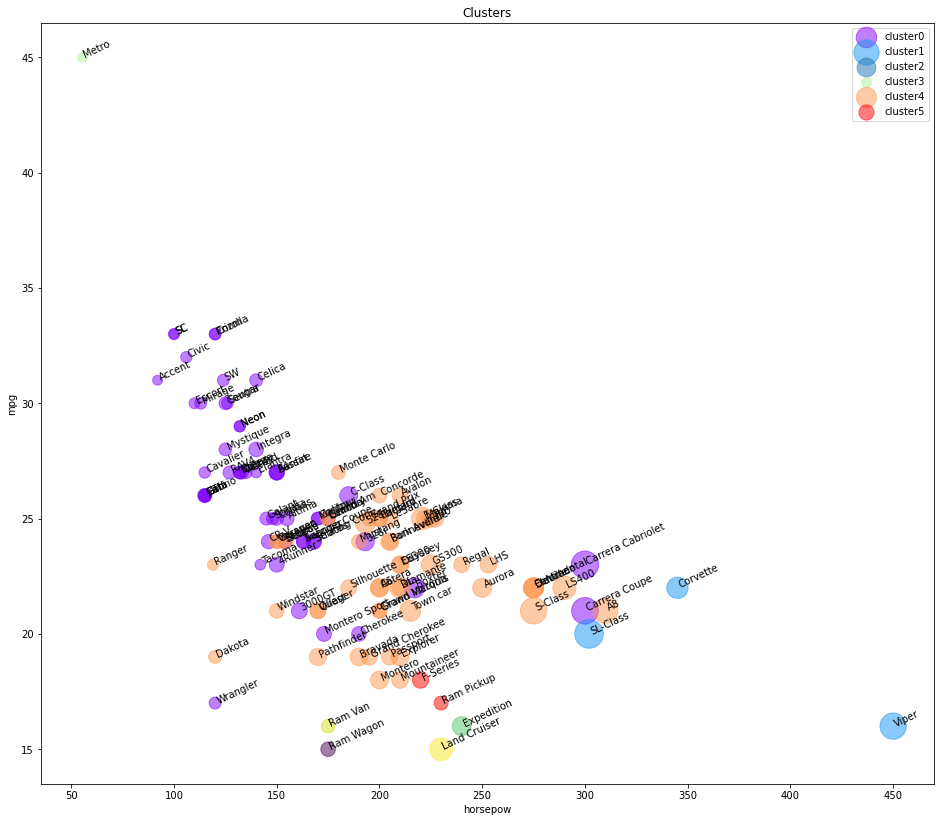

In [32]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
clusters_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, clusters_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

#### Menghitung jumlah kasus di setiap kelompok

In [33]:
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

#### Melihat karakteristik masing-masing cluster

In [34]:
agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-34-e0779597faec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

#### Plotting Dendogram

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

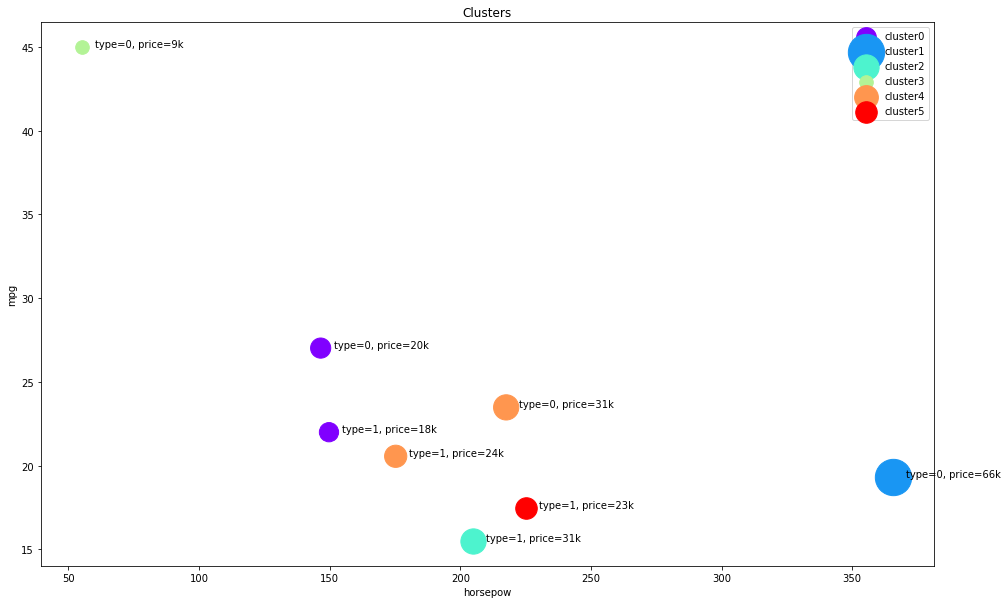

In [35]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, clusters_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

# Agglomerative Clustering Dataset Iris

## Read Data

In [36]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
pdf = pd.read_csv(url, names=names)
print("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (150, 5)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning

In [37]:
print("Shape of dataset before cleaning: ", pdf.size)
pdf[['sepal-length', 'sepal-width', 
     'petal-length', 'petal-width']] = pdf[['sepal-length', 'sepal-width', 
     'petal-length', 'petal-width']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  750
Shape of dataset after cleaning:  750


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Selection

In [38]:
featureset = pdf[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]

## Normalization

In [39]:
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

## Clustering With Scipy

In [40]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-40-794f8baad320>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


### Linkage

In [41]:
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')
Z = hierarchy.linkage(D, 'complete')

<ipython-input-41-9e605160fec4>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-41-9e605160fec4>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')
<ipython-input-41-9e605160fec4>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


#### Single Linkage

In [42]:
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##### Menentukan jumlah cluster

In [43]:
k = 4
clusters = fcluster(X, k, criterion='maxclust')
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##### Plotting Dendogram

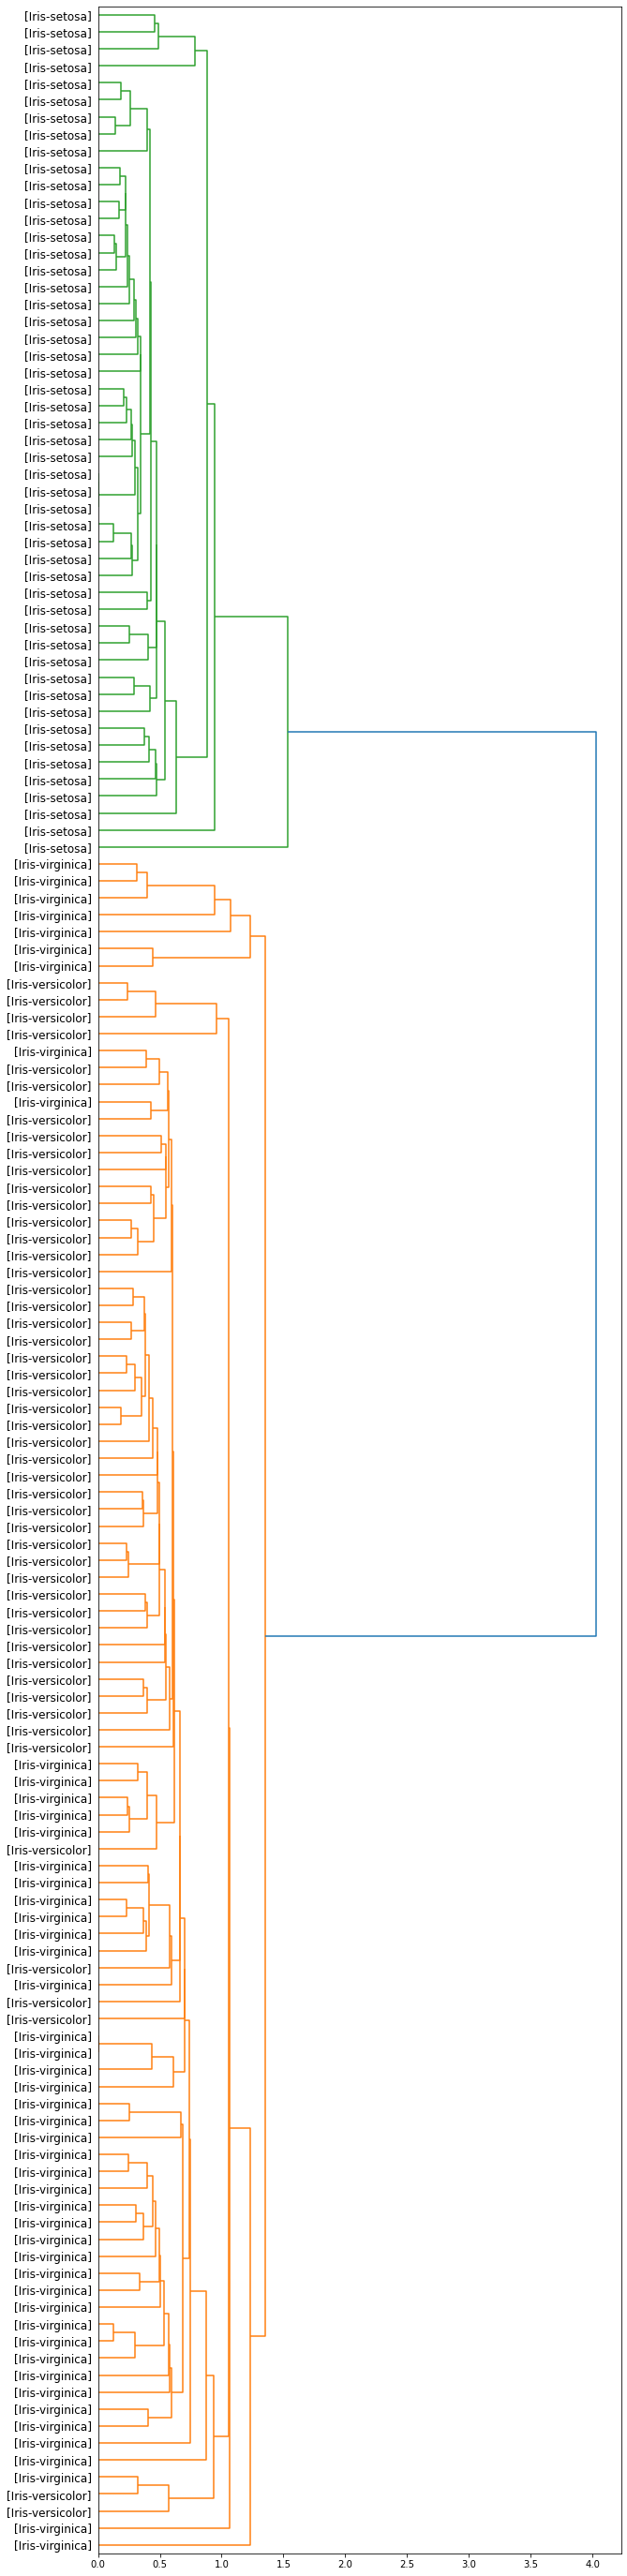

In [44]:
fig = pylab.figure(figsize=(10,50))
def lif(id):
    return '[%s]' % (pdf['class'][id])

dendro = hierarchy.dendrogram(X, leaf_label_func=lif, leaf_rotation=0, leaf_font_size=12, orientation='right')

#### Average Linkage

In [45]:
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

##### Menentukan jumlah cluster

In [46]:
k = 4
clusters = fcluster(Y, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3,
       3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

##### Plotting Dendogram

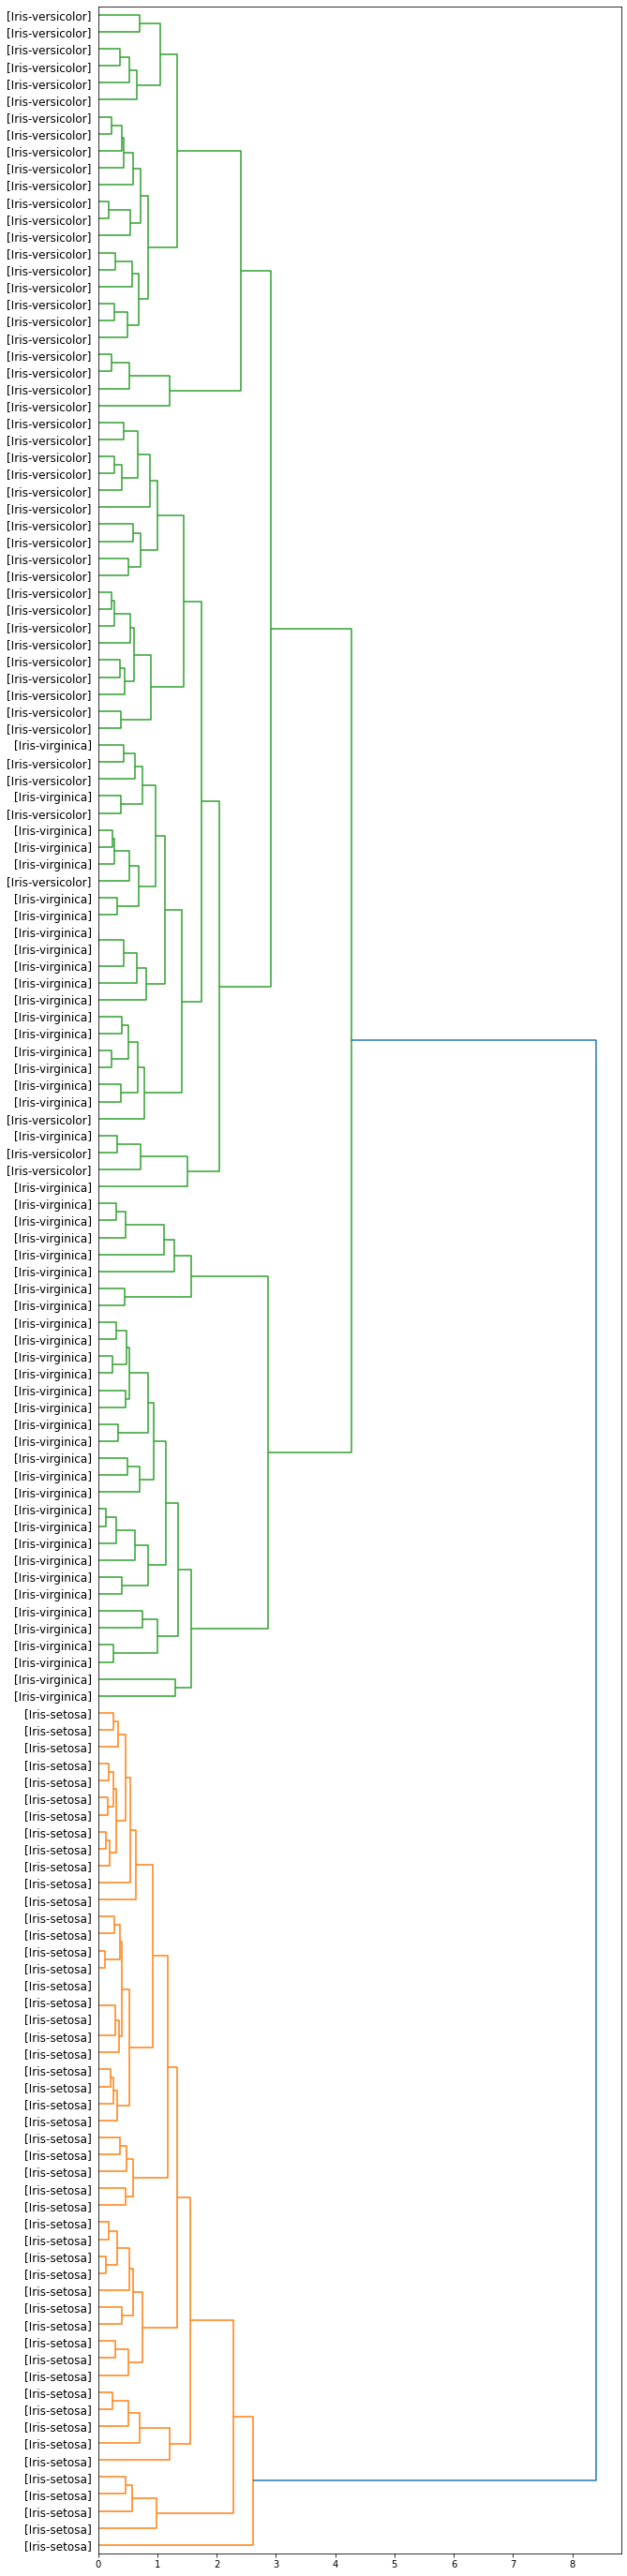

In [47]:
fig = pylab.figure(figsize=(10,50))
def lif(id):
    return '[%s]' % (pdf['class'][id])

dendro = hierarchy.dendrogram(Y, leaf_label_func=lif, leaf_rotation=0, leaf_font_size=12, orientation='right')

#### Complete Linkage

In [48]:
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 4, 6, 4, 5, 4, 6, 5, 4, 6, 4, 6, 4,
       4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 9, 4, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       6, 6, 6, 4, 6, 5, 6, 6, 6, 4, 5, 6, 8, 4, 8, 9, 9, 7, 4, 8, 9, 7,
       9, 9, 9, 4, 9, 9, 9, 7, 7, 4, 8, 4, 7, 4, 9, 8, 4, 4, 9, 8, 8, 7,
       9, 4, 4, 7, 8, 9, 4, 9, 8, 9, 4, 8, 8, 9, 9, 9, 9, 4], dtype=int32)

##### Menentukan jumlah cluster

In [49]:
k = 4
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 3, 2, 4, 4, 3,
       4, 4, 4, 2, 4, 4, 4, 3, 3, 2, 4, 2, 3, 2, 4, 4, 2, 2, 4, 4, 4, 3,
       4, 2, 2, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2], dtype=int32)

##### Plotting Dendogram

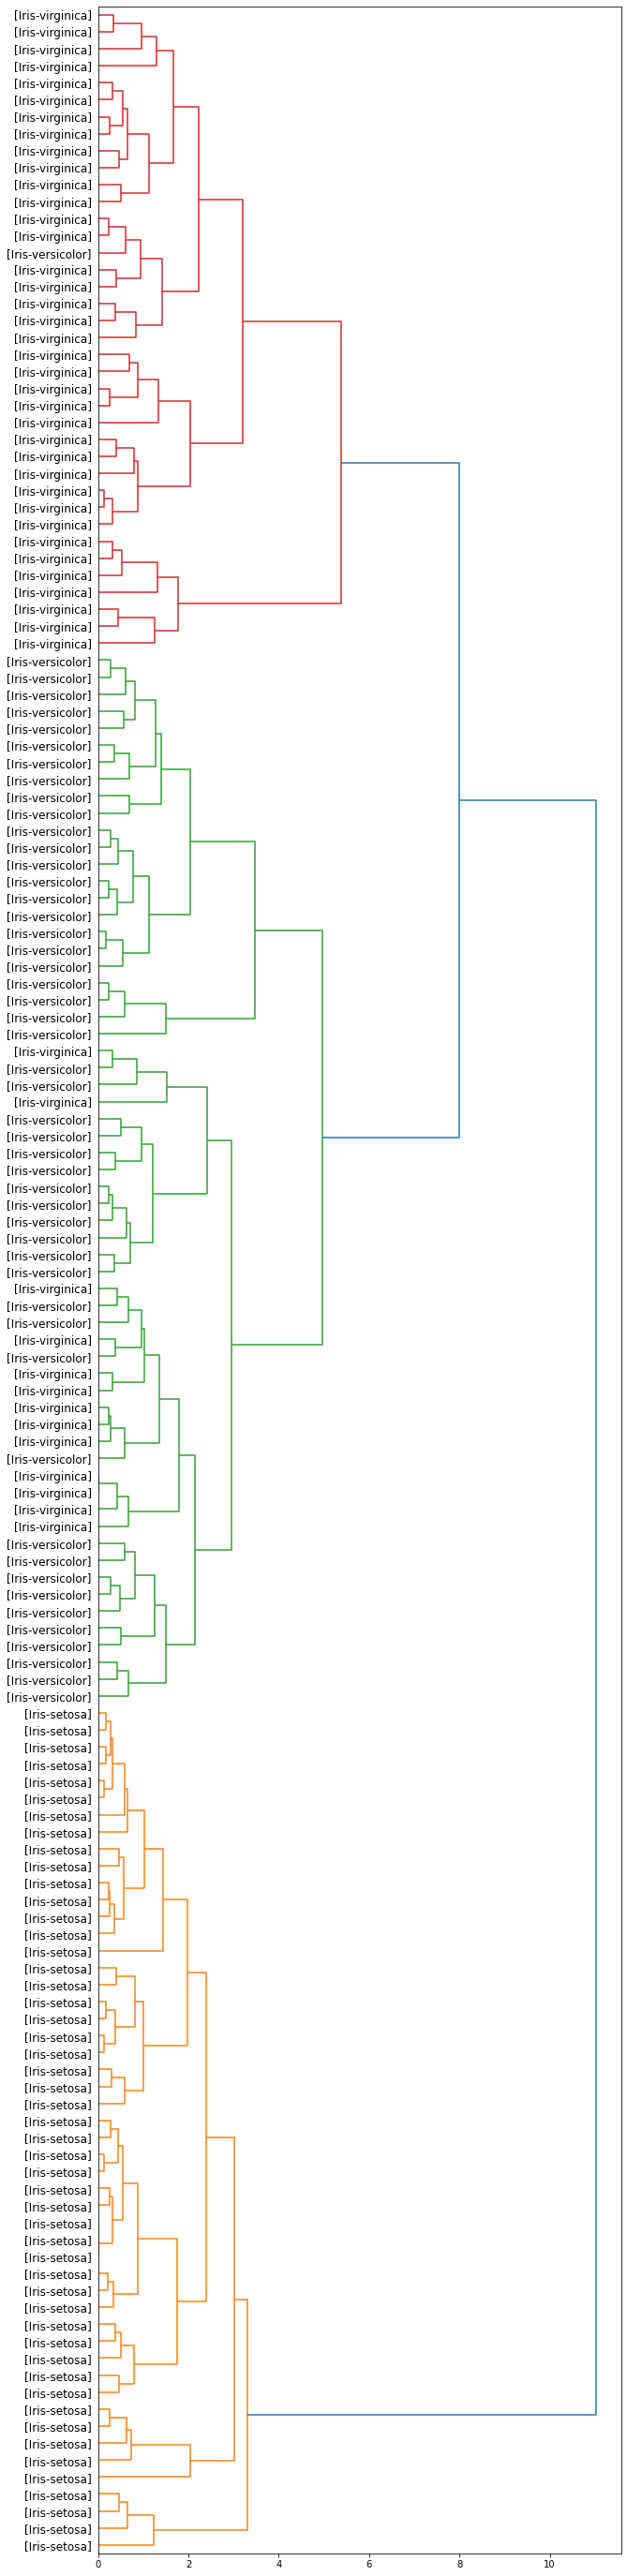

In [50]:
fig = pylab.figure(figsize=(10,50))
def lif(id):
    return '[%s]' % (pdf['class'][id])

dendro = hierarchy.dendrogram(Z, leaf_label_func=lif, leaf_rotation=0, leaf_font_size=12, orientation='right')

## Clustering With Scikit-Learn

In [51]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


### Single Linkage

In [52]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='single')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Menambah field untuk menunjukkan cluster dari setiap baris

In [53]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'sepal-width')

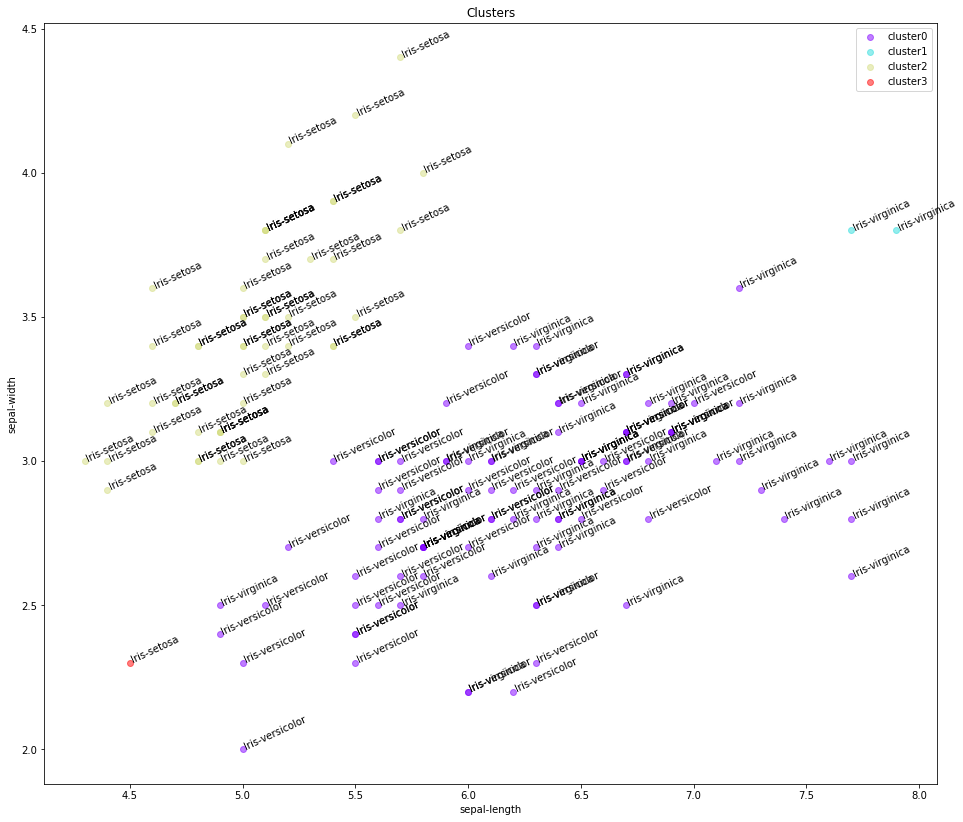

In [54]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
clusters_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, clusters_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['sepal-length'][i], subset['sepal-width'][i], str(subset['class'][i]), rotation=25)
    plt.scatter(subset['sepal-length'], subset['sepal-width'], c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

#### Menghitung jumlah kasus di setiap kelompok

In [55]:
pdf.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-versicolor    50
          Iris-virginica     48
1         Iris-virginica      2
2         Iris-setosa        49
3         Iris-setosa         1
Name: cluster_, dtype: int64

#### Melihat karakteristik masing-masing cluster

In [56]:
agg_iris = pdf.groupby(['cluster_', 'class'])['sepal-length','sepal-width','petal-length','petal-width'].mean()
agg_iris

<ipython-input-56-8a7c6589efec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = pdf.groupby(['cluster_', 'class'])['sepal-length','sepal-width','petal-length','petal-width'].mean()


sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.537500     2.939583      5.510417     2.022917
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000

#### Plotting Dendogram

<ipython-input-57-1dc17db5eb13>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')


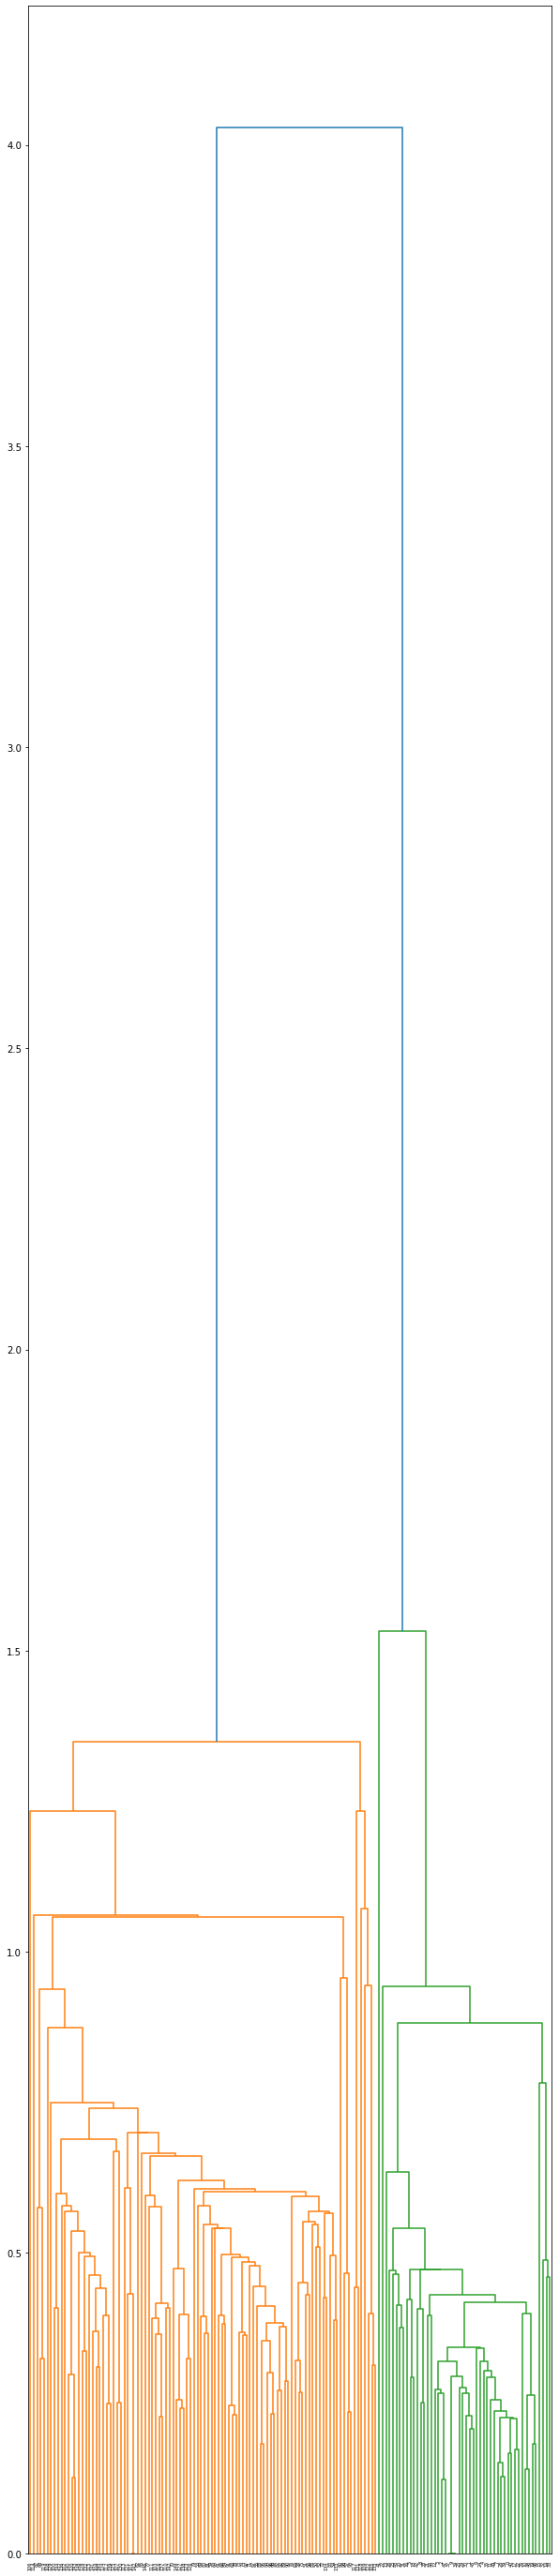

In [57]:
fig = pylab.figure(figsize=(10,50))
X = hierarchy.linkage(dist_matrix, 'single')
dendro = hierarchy.dendrogram(X)

### Average Linkage

In [58]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

#### Menambah field untuk menunjukkan cluster dari setiap baris

In [59]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'sepal-width')

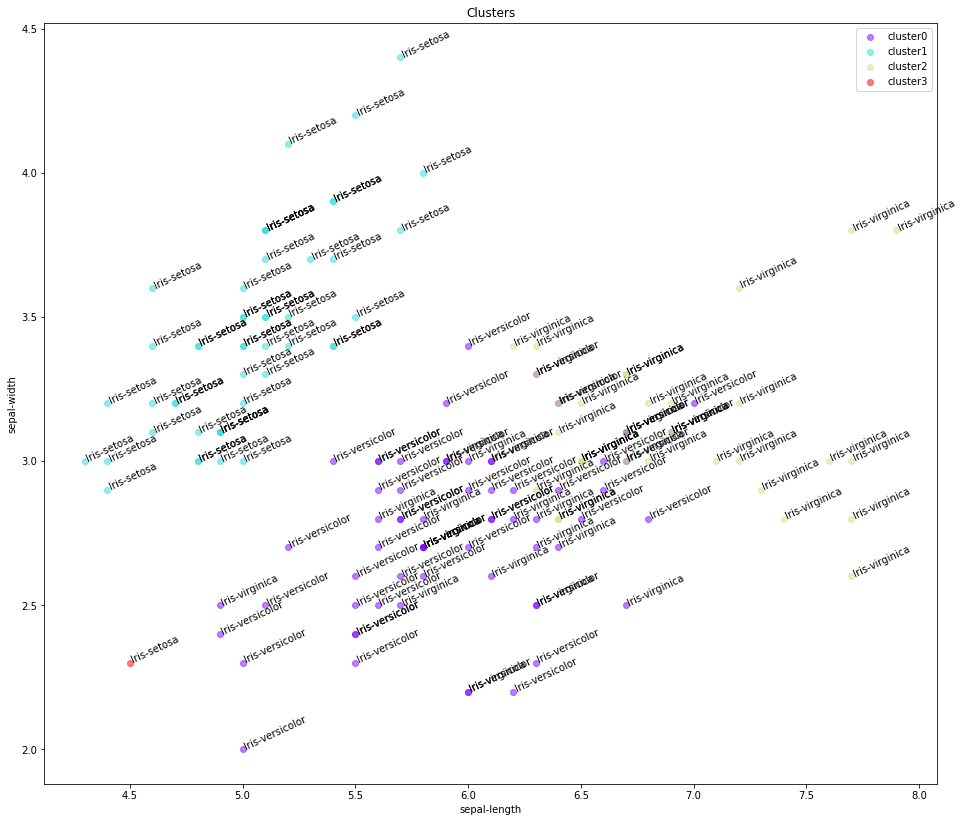

In [60]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
clusters_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, clusters_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['sepal-length'][i], subset['sepal-width'][i], str(subset['class'][i]), rotation=25)
    plt.scatter(subset['sepal-length'], subset['sepal-width'], c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

#### Menghitung jumlah kasus di setiap kelompok

In [61]:
pdf.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-versicolor    50
          Iris-virginica     17
1         Iris-setosa        49
2         Iris-virginica     33
3         Iris-setosa         1
Name: cluster_, dtype: int64

#### Melihat karakteristik masing-masing cluster

In [62]:
agg_iris = pdf.groupby(['cluster_', 'class'])['sepal-length','sepal-width','petal-length','petal-width'].mean()
agg_iris

<ipython-input-62-8a7c6589efec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = pdf.groupby(['cluster_', 'class'])['sepal-length','sepal-width','petal-length','petal-width'].mean()


sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       5.994118     2.694118      5.058824     1.817647
1        Iris-setosa          5.016327     3.440816      1.467347     0.242857
2        Iris-virginica       6.893939     3.118182      5.806061     2.133333
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000

#### Plotting Dendogram

<ipython-input-63-d5b4078aa087>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


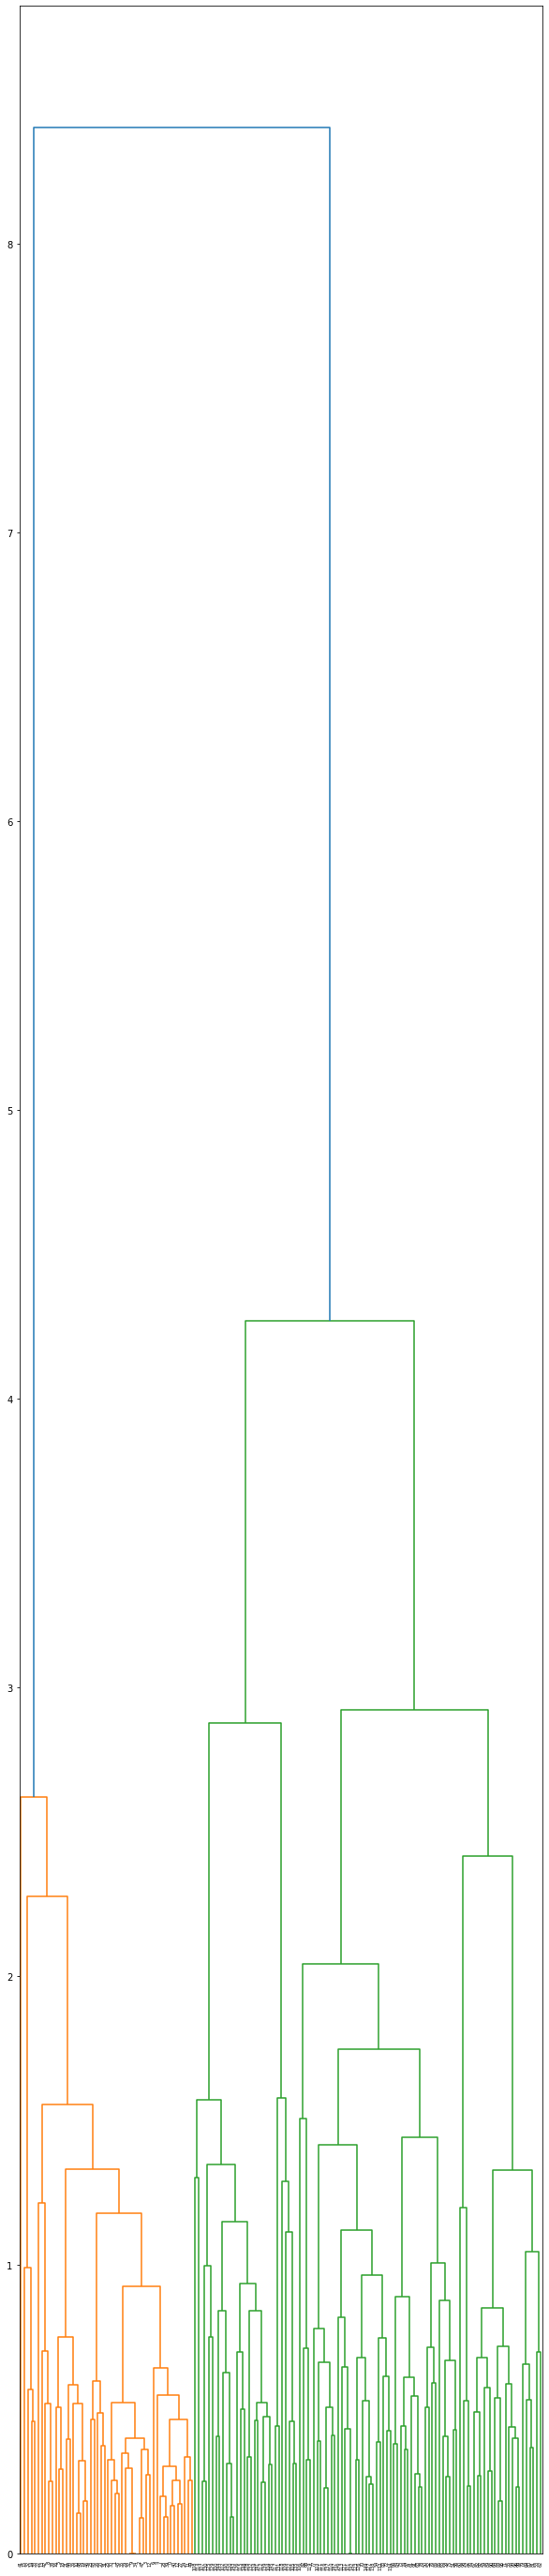

In [63]:
fig = pylab.figure(figsize=(10,50))
Y = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Y)

### Complete Linkage

In [64]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

#### Menambah field untuk menunjukkan cluster dari setiap baris

In [65]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,3
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'sepal-width')

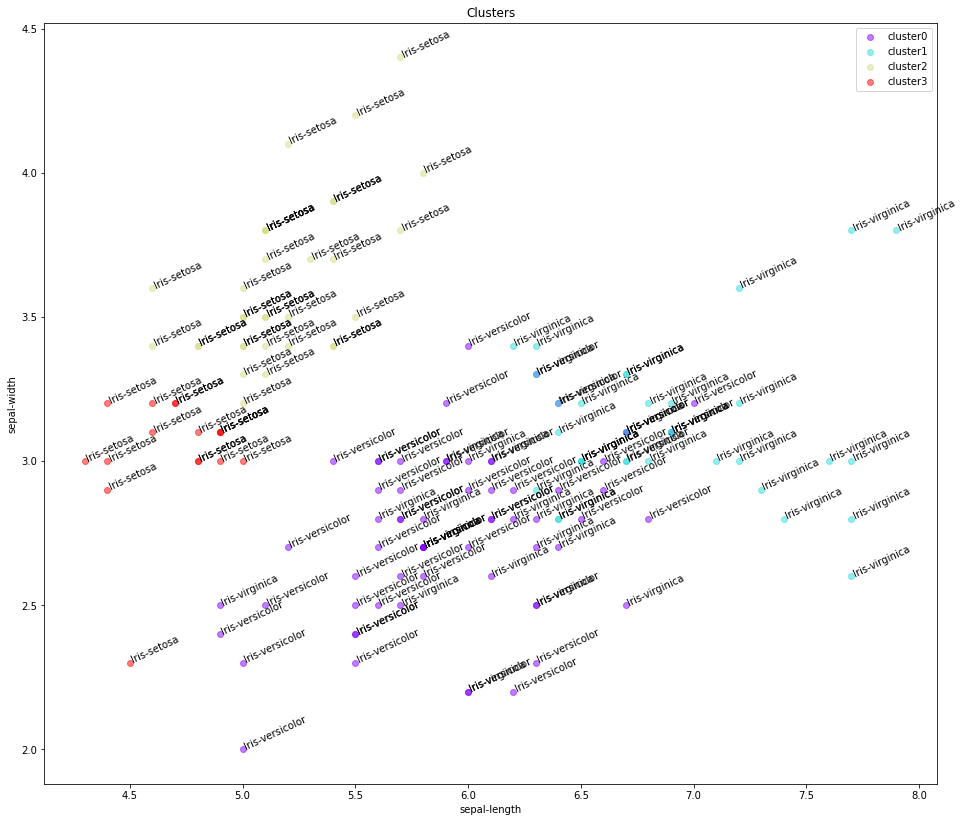

In [66]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
clusters_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, clusters_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['sepal-length'][i], subset['sepal-width'][i], str(subset['class'][i]), rotation=25)
    plt.scatter(subset['sepal-length'], subset['sepal-width'], c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

#### Menghitung jumlah kasus di setiap kelompok

In [67]:
pdf.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-versicolor    49
          Iris-virginica     17
1         Iris-versicolor     1
          Iris-virginica     33
2         Iris-setosa        33
3         Iris-setosa        17
Name: cluster_, dtype: int64

#### Melihat karakteristik masing-masing cluster

In [68]:
agg_iris = pdf.groupby(['cluster_', 'class'])['sepal-length','sepal-width','petal-length','petal-width'].mean()
agg_iris

<ipython-input-68-8a7c6589efec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_iris = pdf.groupby(['cluster_', 'class'])['sepal-length','sepal-width','petal-length','petal-width'].mean()


sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-versicolor      5.920408     2.765306      4.244898     1.318367
         Iris-virginica       5.994118     2.694118      5.058824     1.817647
1        Iris-versicolor      6.700000     3.000000      5.000000     1.700000
         Iris-virginica       6.893939     3.118182      5.806061     2.133333
2        Iris-setosa          5.172727     3.618182      1.487879     0.275758
3        Iris-setosa          4.682353     3.029412      1.417647     0.182353

#### Plotting Dendogram

<ipython-input-69-e5e26e1822d2>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


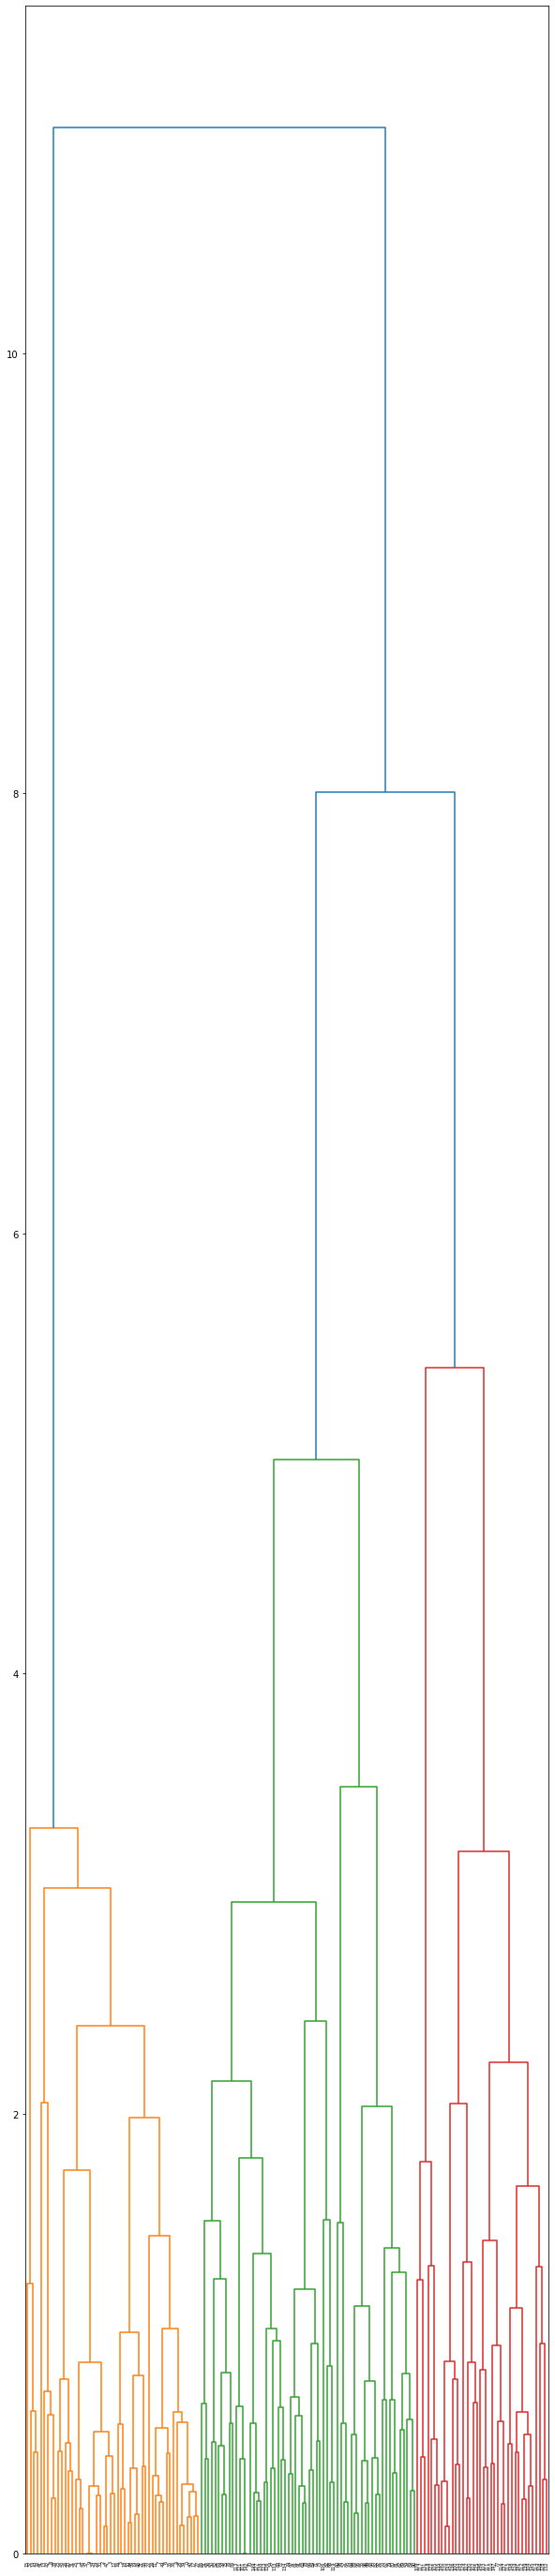

In [69]:
fig = pylab.figure(figsize=(10,50))
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)